#Import Libraries

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPool2D, MaxPool1D
from tensorflow.keras.layers import Dropout, BatchNormalization

from google.colab import drive

print("Module Loaded.")
print("TensorFlow Version :{}".format(tf.__version__))
print("NumPy Version :{}".format(np.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

TensorFlow 2.x selected.
Module Loaded.
TensorFlow Version :2.1.0-rc1
NumPy Version :1.17.4
Matplotlib Version :3.1.2


In [2]:
drive.mount('/content/drive')

data_path = pathlib.Path('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/resize_data/furniture')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
class_name = np.array([item.name for item in data_path.glob('*')])
print(class_name)

[]


# Prepare Data

- **Unzip Data**

In [4]:
import os

cwd = os.getcwd()
print(cwd)

!unzip /content/drive/Shared\ drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture.zip -d /content/furniture

/content
Archive:  /content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture.zip
replace /content/furniture/bed/bed (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/furniture/bed/bed (1).jpg  
  inflating: /content/furniture/bed/bed (10).jpg  
  inflating: /content/furniture/bed/bed (100).jpg  
  inflating: /content/furniture/bed/bed (1000).jpg  
  inflating: /content/furniture/bed/bed (1001).jpg  
  inflating: /content/furniture/bed/bed (1002).jpg  
  inflating: /content/furniture/bed/bed (1003).jpg  
  inflating: /content/furniture/bed/bed (1004).jpg  
  inflating: /content/furniture/bed/bed (1005).jpg  
  inflating: /content/furniture/bed/bed (1006).jpg  
  inflating: /content/furniture/bed/bed (1007).jpg  
  inflating: /content/furniture/bed/bed (1008).jpg  
  inflating: /content/furniture/bed/bed (1009).jpg  
  inflating: /content/furniture/bed/bed (101).jpg  
  inflating: /content/furniture/bed/bed (1010).jpg  
  inflating: /content/furni

In [5]:
data_path = pathlib.Path('/content/furniture')
class_name = np.array([item.name for item in data_path.glob('*')])
print(class_name)

['bed' 'sofa' 'fireplace' 'chair' 'floor lamp' 'dressing table' 'curtain'
 'table' 'entertainment center' 'bookshelves']


# Resize Image

In [0]:
# from PIL import Image

# for j in class_name[1:4]:
#     image = pathlib.Path('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data/furniture/'+j)
#     image = list(image.glob('*.jpg'))
#     for i in range(len(image)):
#         im = Image.open(str(image[i])).convert('RGB')
#         resize_image = im.resize((im.size[0]//2,im.size[1]//2))
#         resize_image.save('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture/{0}/{1}{2:03d}.jpg'.format(j,j,i))
#         print(j, i)

In [0]:
data_path = pathlib.Path('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture')

#ImageGenerator

In [0]:
img_size =  112
batch_n = 200

data_path = pathlib.Path('/content/furniture')

In [0]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                #horizontal_flip=True, 
                                #vertical_flip=True,
                                #rotation_range=30,
                                zoom_range=0.1,
                                brightness_range=[0.8,1.2],
                                validation_split=0.2,
                                rescale=1./255)

In [10]:
train_data_generate = image_generator.flow_from_directory(
                        directory=str(data_path),
                        batch_size=batch_n,
                        shuffle=True,
                        target_size=(img_size, img_size),
                        classes = list(class_name),
                        subset='training')
test_data_generate = image_generator.flow_from_directory(
                        directory=str(data_path),
                        batch_size=batch_n,
                        shuffle=True,
                        target_size=(img_size, img_size),
                        classes = list(class_name),
                        subset='validation')

Found 12559 images belonging to 10 classes.
Found 3135 images belonging to 10 classes.


#Load Inception

import model

In [23]:
import tensorflow.keras.applications.inception_v3 as incep

model_incep = incep.InceptionV3(
    weights="imagenet", 
    #include_top=False,    # dense layer 이 후는 제외
    input_tensor=tf.keras.layers.Input(shape=(img_size, img_size, 3))
    #input_tensor=keras.layers.Input(shape=(49, 49, 3))
)

model_incep.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

##fine tuning

freeze layers

In [24]:
# slicing which layers not to train
# for layer in model_incep.layers[:] :
#   layer.trainable = False

for layer in model_incep.layers :
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fdeb4fd1208> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdeb4fdef98> True
<tensorflow.python.keras.layers.normalization.BatchNormalization object at 0x7fded9140be0> True
<tensorflow.python.keras.layers.core.Activation object at 0x7fdeb502e1d0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdeb4fdee48> True
<tensorflow.python.keras.layers.normalization.BatchNormalization object at 0x7fdeb4f94f60> True
<tensorflow.python.keras.layers.core.Activation object at 0x7fdeb4fa0a58> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdeb4fa0198> True
<tensorflow.python.keras.layers.normalization.BatchNormalization object at 0x7fdeb4f45da0> True
<tensorflow.python.keras.layers.core.Activation object at 0x7fdeb4f4e7f0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fdeb4f4e080> True
<tensorflow.python.keras.layers.convolutional.Conv2D 

make ai-kea model

In [14]:
ai_kea = tf.keras.models.Sequential()

ai_kea.add(model_incep)

# Here add new layers
ai_kea.add(Flatten())
#ai_kea.add(Dense(1024, activation='relu'))
#model_fine.add(keras.layers.Dropout(0.5))
#model_fine.add(keras.layers.LeakyReLU(alpha=0.1))
#ai_kea.add(BatchNormalization())   # 필히 사용할 것
ai_kea.add(Dense(10, activation='softmax'))
ai_kea.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 1000)              23851784  
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10010     
Total params: 23,861,794
Trainable params: 23,827,362
Non-trainable params: 34,432
_________________________________________________________________


In [0]:
#inputs = model_incep.inputs
#print(inputs[0])
inputs = model_incep.get_layer('mixed2').output
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', name='conv_feat')(inputs) 
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x) 

aikea_model = tf.keras.Model(inputs=model_incep.inputs, outputs=outputs, name='grad_model')


In [53]:
grad_model = tf.keras.models.Model(
    [model_incep.inputs],                           # input: vgg16 inputs
    [aikea_model.get_layer('conv_feat').output,  # outputs: vgg16 last conv
     aikea_model.output]                           # softmax out
)
print(grad_model)

#model compile & train

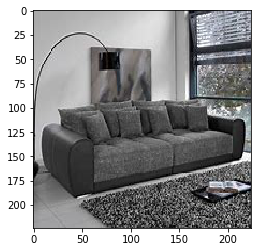

In [54]:

img_path = '/content/furniture/sofa/sofa (100).jpg'
from tensorflow.keras.preprocessing import image
# load the image with the required shape
img = image.load_img(img_path, target_size=(112, 112))
# check image
plt.imshow(img)
# convert the image to an array
img = image.img_to_array(img)         # tf.keras.processing
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)     # numpy

img = incep.preprocess_input(img)

In [55]:
img.shape
type(img)

numpy.ndarray

**Build CAM**

In [58]:
# GradientTape 설정
with tf.GradientTape(persistent=True) as tape:
    conv_out, predict = grad_model(img)   # feature, predict
    class_out = predict[:, np.argmax(predict[0])]    # class     

# feature map
output = conv_out[0]
# Get gradient for input image

grads = tape.gradient(class_out, conv_out)[0]

# check grads' shape
#print(type(grads))
grads.shape, output.shape

(TensorShape([25, 25, 64]), TensorShape([25, 25, 64]))

In [59]:
# Average gradients spatially
weights = tf.reduce_mean(grads, axis=(0, 1))

# Build a map of filters according to gradients importance
cam = np.ones(output.shape[0:2], dtype=np.float32)

for index, w in enumerate(weights):
    cam += w * output[:, :, index]

# check cam shape
cam.shape, weights.shape

(TensorShape([25, 25]), TensorShape([64]))

> ### Blending CAM on original image

((172, 209, 3), numpy.ndarray)

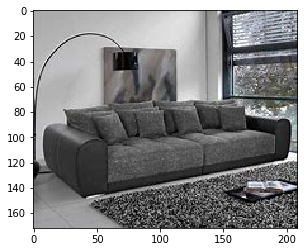

In [60]:
import cv2

# image read: ndarray type
img = cv2.imread(img_path)
# GBR -> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # cv2는 기본적으로 image를 GBR로 처리

plt.imshow(img)

img.shape, type(img)

- CAM with HeatMap **(추후 Rectangle로 변경 필요)**

(172, 209, 3)

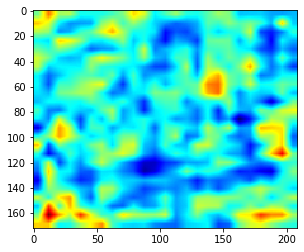

In [61]:
# resize cam
cam = cv2.resize(cam.numpy(), (img.shape[1], img.shape[0]))
cam = np.maximum(cam, 0)          # 0 이상의 값만 취함
# heatmap : minmax normalized one
heatmap = (cam - cam.min()) / (cam.max() - cam.min())

# convert heatmap to rgb
heatmap = np.uint8(255 * heatmap)                       # RGB range (0~255)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # apply color map
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)      # colormap to RGB

# check heatmap shape
plt.imshow(heatmap)
heatmap.shape

- Blending HeatMap on Image

In [0]:
# blending heatmap: image: 100%, heatmap: 50%
output_image = cv2.addWeighted(img.astype('uint8'), 1,  # 1: 100%
                               heatmap, 0.5,            # 0.5: 50%
                               0)

NameError: ignored

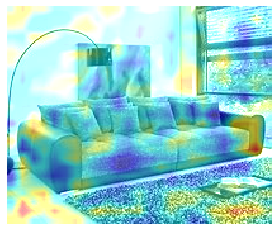

In [63]:
# plot blended image
plt.imshow(output_image)
plt.axis('off')
plt.title(decode_predictions(preds, top=2)[0][0][1])

In [0]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title('Validation Loss')
plt.semilogy(epochs, history.history['val_loss'], 'b', label='CNN')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.0, 0.6])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Validation Accuray')
plt.semilogy(epochs, history.history['val_accuracy'], 'b', label='CNN')
plt.grid(True)
plt.ylabel('Accuracy')
plt.ylim([0.5, 0.9])
plt.legend(loc='best')
plt.show()

In [0]:
print(np.max(history.history['val_accuracy']))